Importing Libraries

In [ ]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import os

#used for visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

#importing Deep Learning libraries for models
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
import pathlib
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Model


In [ ]:
#Loading Dataset
os.environ['KAGGLE_CONFIG_DIR']="/content/"
!kaggle datasets download wobotintelligence/face-mask-detection-dataset

100% 2.49G/2.50G [00:48<00:00, 50.3MB/s]
100% 2.50G/2.50G [00:48<00:00, 55.2MB/s]


In [ ]:
import zipfile
! unzip "face-mask-detection-dataset.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: Medical mask/Medical mask/Medical Mask/images/1091.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1092.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1093.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1094.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1095.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1096.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1097.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1098.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1099.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1101.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1102.jpg  
  inflating: Medical mask/Medical mask/Medical Mask/images/1103.png  
  inflating: Medical mask/Medical mask/Medical Mask/images/1104.jpg  
  inflating: Medical mask/Medical mask/

In [ ]:
img_dir = 'Medical mask/Medical mask/Medical Mask/images'
train_full = pd.read_csv('train.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
#Checking the file has been loaded or not
train_full.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [ ]:
#Display number of unique images in training list
train_full.name.unique().shape

(4326,)

In [ ]:
#Displaying number of classes and their count
train_full.classname.value_counts()

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

Total Classes:  20

> Classes <
 ['face_with_mask' 'mask_colorful' 'face_no_mask'
 'face_with_mask_incorrect' 'mask_surgical' 'face_other_covering'
 'scarf_bandana' 'eyeglasses' 'helmet' 'face_shield' 'sunglasses' 'hood'
 'hat' 'goggles' 'hair_net' 'hijab_niqab' 'other' 'gas_mask'
 'balaclava_ski_mask' 'turban']


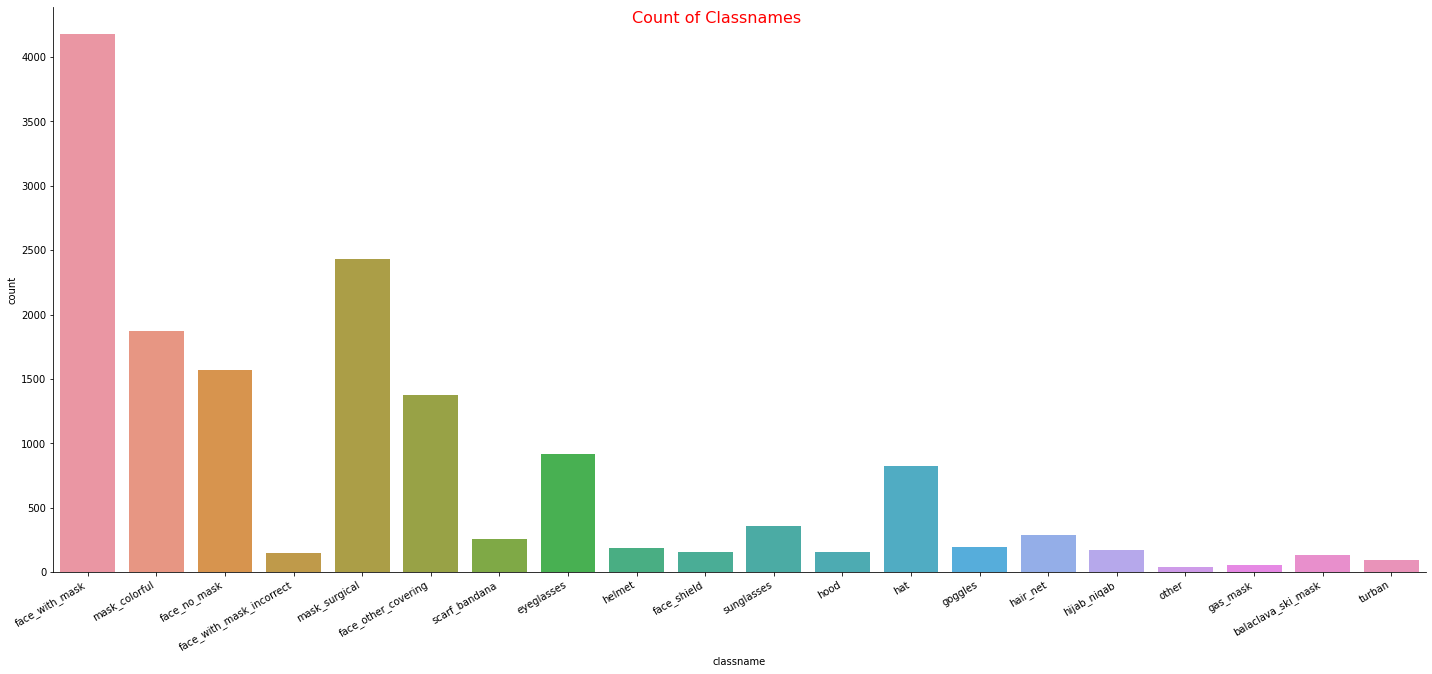

In [ ]:
classes = train_full["classname"].unique()
print("Total Classes: ",len(classes))
print("\n> Classes <\n",classes)

ax = sns.catplot(x='classname',kind='count',data=train_full,orient="h",height=10,aspect=2)
ax.fig.suptitle('Count of Classnames',fontsize=16,color="r")
ax.fig.autofmt_xdate()

In [ ]:
sample_per_class = train_full.groupby('classname').sample(3)

In [ ]:
sample_per_class.shape
sample_per_class

,name,x1,x2,y1,y2,classname
4977,2517.png,139,58,329,347,balaclava_ski_mask
4912,2699.png,281,62,483,437,balaclava_ski_mask
12286,4676.png,364,174,409,238,balaclava_ski_mask
4342,3934.png,697,119,737,137,eyeglasses
3893,5434.jpg,216,359,587,489,eyeglasses
11720,3825.png,461,297,495,317,eyeglasses
6177,6289.jpg,526,95,621,191,face_no_mask
13091,5578.jpg,284,162,427,335,face_no_mask
997,6313.jpg,538,34,852,328,face_no_mask
13673,3097.png,216,1,609,380,face_other_covering


Create new datasets


In [ ]:
#Considering classes with face_with_mask or face_no_mask and leaving others
options = ['face_with_mask','face_no_mask']
train = train_full[train_full['classname'].isin(options)].sort_values('name')
#one-hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encode classname column since it has only two classes
train['target'] = le.fit_transform(train.classname)
print("Number of unique images in train set: ", train.name.nunique())
train.head()

Number of unique images in train set:  3390


,name,x1,x2,y1,y2,classname,target
13381,1801.jpg,451,186,895,697,face_no_mask,0
3463,1802.jpg,110,71,273,272,face_with_mask,1
14835,1803.jpg,126,75,303,333,face_with_mask,1
5867,1804.jpg,112,113,262,307,face_with_mask,1
6194,1805.jpg,728,180,853,336,face_with_mask,1


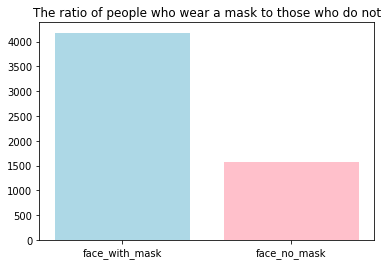

In [ ]:
plt.bar(['face_with_mask','face_no_mask'], train.classname.value_counts(), color = ['lightblue','pink']);
plt.title('The ratio of people who wear a mask to those who do not');

In [ ]:
print("Number of unique images in submission set: ", submission.name.nunique())
submission.head()

Number of unique images in submission set:  1698


,name,x1,x2,y1,y2,classname
0,1800.jpg,NaN,NaN,NaN,NaN,NaN
1,1800.jpg,NaN,NaN,NaN,NaN,NaN
2,1800.jpg,NaN,NaN,NaN,NaN,NaN
3,1799.jpg,NaN,NaN,NaN,NaN,NaN
4,1799.jpg,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Converting dataframes to list having just unique names of images 
train_images = train.name.unique().tolist()
test_images = submission.name.unique().tolist()


Sample image from train set

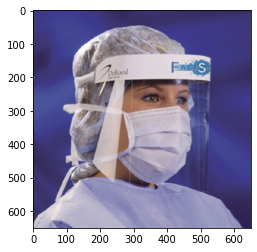

In [ ]:
#Sample image from train set
# pick a random index from train_images
i = np.random.choice(np.arange(1801, len(train_images)))
# read image
img=plt.imread(os.path.join(img_dir,train_images[i]))
plt.imshow(img)


Sample image from test set

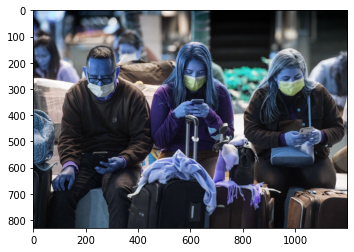

In [ ]:
#Sample image from test set
# pick a random index from test_images
i = np.random.choice(len(test_images))
# read image
img = cv2.imread(os.path.join(img_dir,test_images[i]))
# plot image
plt.imshow(img)

In [ ]:
# create a list that would contain bounding boxes for each face
bounding_box=[]
for i in range(len(train)):
    lst = []
    # extract coordinates of bounding box
    for box in train.iloc[i][["x1",'x2','y1','y2']]:
        lst.append(box)
    bounding_box.append(lst)
    
#add new column with bounding boxes
train["bounding_box"] = bounding_box  

# get box(es) for each unique image
def get_boxes(filename):
    boxes = []
    # get bounding_box column for all rows where train["name"] == filename
    for box in train[train["name"] == filename]["bounding_box"]:
        boxes.append(box)
    return boxes

[[249, 221, 537, 653], [537, 164, 626, 268]]


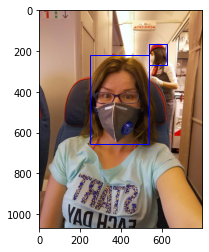

In [ ]:
# draw an image with detected objects
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width-x, height-y, 
                             fill=False, color='b', linewidth=1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()
    
# pick a random index from train_images
i = np.random.choice(np.arange(1801, len(train_images)))
# read image
image = plt.imread(os.path.join(img_dir,train_images[i]))
# get boxes for image
boxes = get_boxes(train_images[i])
print(boxes)
draw_facebox(image, boxes)

Create training data

In [ ]:
#Creation of training data- Resize, reshape
img_size=128
data=[]
for i in range(len(train)):
    x,y,width,height = train.iloc[i]['bounding_box']
    image = train.iloc[i]['name']
    # read image with green channel
    img_array = cv2.imread(os.path.join(img_dir,image), 1)
    # crop image with bounding box
    img_cropped = img_array[y:height,x:width] 
    # resize cropped image
    img = cv2.resize(img_cropped,(img_size,img_size))
    data.append([img,train.iloc[i]['target']])     

Plot a random cropped image from data

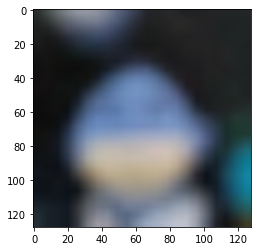

In [ ]:
#Plot a random cropped image from data
# Pick a random index from data
i = np.random.choice(range(len(data)))
plt.imshow(data[i][0]);

In [ ]:
#Rescaling the images by dividing it by 255 and converting features and labels in arrays
X=[]
Y=[]
for features, labels in data:
    X.append(features)
    Y.append(labels)
X = np.array(X)/255 
print('Shape of X:', X.shape)
Y = np.array(Y)
print('Shape of Y:', Y.shape)

Shape of X: (5749, 128, 128, 3)
Shape of Y: (5749,)


Splitting into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
# split our data into train and validation sets
X_train,X_val,y_train,y_val = train_test_split(X, Y,test_size=0.12,random_state=42)

Build and fit the model

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
#three convolutional layers
#First conv block
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second conv block
model.add(Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Third Conv block
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Dropout for regularization
model.add(Dropout(0.25))
#flatten output of conv
model.add(Flatten())
#hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

Compiling the sequential model and training for 30 epochs



In [ ]:
#compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
              loss='binary_crossentropy', metrics=['accuracy']) 
# training the model for 30 epochs
history = model.fit(X_train,y_train,batch_size=32,
                 epochs=30,
                 validation_data=(X_val, y_val))

Epoch 1/30
159/159 [==============================] - 7s 41ms/step - loss: 0.0965 - accuracy: 0.9634 - val_loss: 0.2088 - val_accuracy: 0.9232
Epoch 2/30
159/159 [==============================] - 6s 39ms/step - loss: 0.0977 - accuracy: 0.9654 - val_loss: 0.2179 - val_accuracy: 0.9217
Epoch 3/30
159/159 [==============================] - 6s 39ms/step - loss: 0.0979 - accuracy: 0.9634 - val_loss: 0.1768 - val_accuracy: 0.9333
Epoch 4/30
159/159 [==============================] - 6s 38ms/step - loss: 0.0916 - accuracy: 0.9660 - val_loss: 0.1569 - val_accuracy: 0.9406
Epoch 5/30
159/159 [==============================] - 6s 39ms/step - loss: 0.0889 - accuracy: 0.9650 - val_loss: 0.1634 - val_accuracy: 0.9406
Epoch 6/30
159/159 [==============================] - 6s 39ms/step - loss: 0.0995 - accuracy: 0.9609 - val_loss: 0.1630 - val_accuracy: 0.9391
Epoch 7/30
159/159 [==============================] - 6s 39ms/step - loss: 0.0783 - accuracy: 0.9703 - val_loss: 0.1805 - val_accuracy: 0.9406

In [ ]:
layers = len(model.layers)

for i in range(layers):
    print(i, ". ", model.layers[i].output.get_shape())

0 .  (None, 128, 128, 32)
1 .  (None, 64, 64, 32)
2 .  (None, 64, 64, 64)
3 .  (None, 32, 32, 64)
4 .  (None, 32, 32, 128)
5 .  (None, 16, 16, 128)
6 .  (None, 16, 16, 128)
7 .  (None, 32768)
8 .  (None, 100)
9 .  (None, 100)
10 .  (None, 1)


curves for accuracy and loss

Text(0.5, 0, 'Epoch')

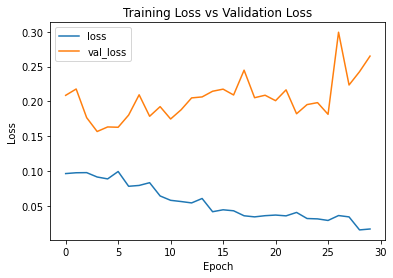

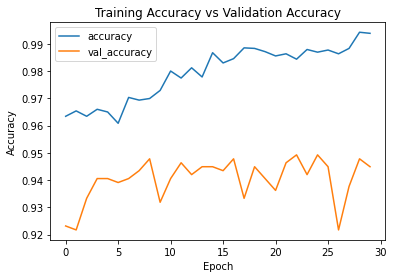

In [ ]:
#curves for accuracy and loss
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
y_pred=model.predict(X_val)
df1=pd.DataFrame()
df1['classname'] = [1 if i > 0.8 else 0 for i in y_pred]
df1

,classname
0,1
1,1
2,1
3,1
4,1
...,...
685,1
686,1
687,0
688,0


In [ ]:
#Converting y prediction dataframe into array
y_pred=np.array(df1)
y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
    

In [ ]:
from sklearn.metrics import classification_report
y_true = y_val
target_names = ['without mask', 'with mask']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

without mask       0.88      0.93      0.91       182
   with mask       0.97      0.96      0.97       508

    accuracy                           0.95       690
   macro avg       0.93      0.94      0.94       690
weighted avg       0.95      0.95      0.95       690



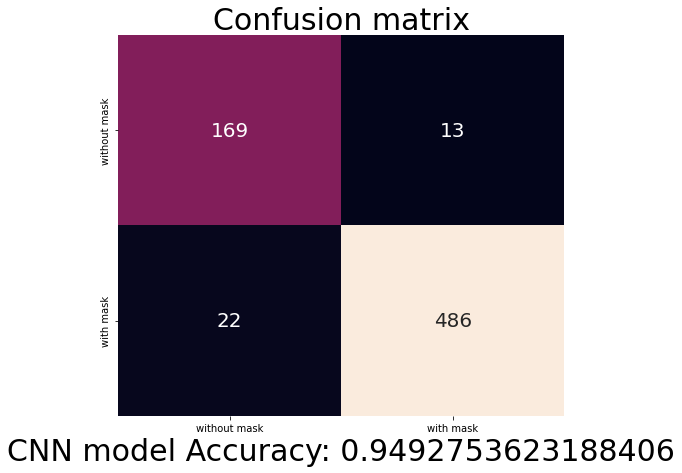

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.subplots(figsize=(8,7))
sns.heatmap(confusion_matrix(y_true,y_pred),xticklabels=target_names, yticklabels=target_names, annot=True,fmt="1.0f",cbar=False,annot_kws={"size": 20})
plt.title("Confusion matrix",fontsize=30)
plt.xlabel(f"CNN model Accuracy: {accuracy_score(y_val,y_pred)}",fontsize=30)
plt.show()

Preprocessing test images

In [ ]:
#Preprocessing test images
pip install mtcnn

     |████████████████████████████████| 2.3 MB 10.6 MB/s 


In [ ]:
def draw_facebox(image, boxes):
    # plot the image
    plt.imshow(image)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for box in boxes:
    # get coordinates
        x, y, width, height = box[0], box[1], box[2], box[3],
        # create the shape
        rect = plt.Rectangle((x, y), width, height, 
                             fill=False, color='r', linewidth=1)
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

Plot a random image from with bounding box(es)

[[514, 263, 268, 321]]


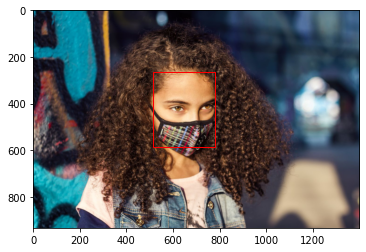

In [ ]:
#Plotting image randomly with bounding box
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

i = np.random.choice(len(test_images))
# load image from file
image = plt.imread(os.path.join(img_dir, df.name[i]))
# detect faces in the image
faces = detector.detect_faces(image)
boxes = [face['box'] for face in faces if face['confidence']>0.99]
print(boxes)
# display faces on the original image
draw_facebox(image, boxes)

In [ ]:
# create lists which would contain filenames of images and bounding boxes
names = []
bboxes = []
for img_name in test_images:
    # load image from file
    image = plt.imread(os.path.join(img_dir, img_name))
    # detect faces in the image
    faces = detector.detect_faces(image)
    for face in faces: 
        if face['confidence']>0.99:
            names.append(img_name)
            bboxes.append(face['box'])

df = pd.DataFrame({'name' : names, 'bounding_box' : bboxes})
df.head()

,name,bounding_box
0,1800.jpg,"[956, 460, 246, 326]"
1,1796.jpg,"[933, 207, 232, 299]"
2,1796.jpg,"[728, 177, 84, 107]"
3,1796.jpg,"[469, 223, 187, 230]"
4,1795.jpg,"[688, 4, 40, 48]"


In [ ]:
data=[]
for i in range(len(df)):
    # replace any negative value with zero
    x,y,width,height = [0 if value < 0 else value for value in df.iloc[i]['bounding_box']]
    image = df.iloc[i]['name']
    # read image with green channel
    img_array = cv2.imread(os.path.join(img_dir,image), 1)
    # crop image with bounding box
    img_cropped = img_array[y:y+height,x:x+width]  
    # resize cropped image
    img = cv2.resize(img_cropped,(img_size,img_size))
    data.append(img)

Predict classes

In [ ]:
#predict classes
X = np.array(data)/255
predict = model.predict(X)
df['classname'] = ['face_with_mask' if i > 0.8 else 'face_with_no_mask' for i in predict]
df

,name,bounding_box,classname
0,1800.jpg,"[956, 460, 246, 326]",face_with_no_mask
1,1796.jpg,"[933, 207, 232, 299]",face_with_mask
2,1796.jpg,"[728, 177, 84, 107]",face_with_no_mask
3,1796.jpg,"[469, 223, 187, 230]",face_with_mask
4,1795.jpg,"[688, 4, 40, 48]",face_with_no_mask
...,...,...,...
1960,0011.jpg,"[204, 72, 65, 86]",face_with_no_mask
1961,0011.jpg,"[406, 106, 70, 98]",face_with_no_mask
1962,0006.jpg,"[441, 668, 57, 70]",face_with_no_mask
1963,0004.jpg,"[630, 176, 213, 267]",face_with_mask


In [ ]:
plt.bar(['face_with_mask','face_no_mask'], df.classname.value_counts(), color = ['lightblue','pink']);
plt.title('The ratio of people who wear a mask to those who do not');

In [ ]:
# save the result to csv
df.to_csv('submission_1.csv')